In [1]:
# Import Statments
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Data Loading
file_path = 'EVCar01-24.csv'
df = pd.read_csv(file_path)

In [37]:
# Explore the data
df.head()

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
1,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
2,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
3,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
4,01/01/05,0,0,0,0,10,14,1,0,0,0,0,0,0,1,38,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             283 non-null    object
 1   FOUR WHEELER (INVALID CARRIAGE)  283 non-null    int64 
 2   HEAVY GOODS VEHICLE              283 non-null    int64 
 3   HEAVY MOTOR VEHICLE              283 non-null    int64 
 4   HEAVY PASSENGER VEHICLE          283 non-null    int64 
 5   LIGHT GOODS VEHICLE              283 non-null    int64 
 6   LIGHT MOTOR VEHICLE              283 non-null    int64 
 7   LIGHT PASSENGER VEHICLE          283 non-null    int64 
 8   MEDIUM GOODS VEHICLE             283 non-null    int64 
 9   MEDIUM PASSENGER VEHICLE         283 non-null    int64 
 10  MEDIUM MOTOR VEHICLE             283 non-null    int64 
 11  OTHER THAN MENTIONED ABOVE       283 non-null    int64 
 12  THREE WHEELER(NT)                283

In [39]:
df['Date'] = pd.to_datetime(df['Date'], format= "%d/%m/%y")
df['Date']

0     2001-01-01
1     2002-01-01
2     2003-01-01
3     2004-01-01
4     2005-01-01
         ...    
278   2019-12-01
279   2020-12-01
280   2021-12-01
281   2022-12-01
282   2023-12-01
Name: Date, Length: 283, dtype: datetime64[ns]

In [40]:
df_sorted = df.sort_values(by='Date', ascending=True)

In [41]:
df_sorted

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,2001-01-01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
24,2001-02-01,0,0,0,0,7,28,0,0,0,0,0,0,0,2,65,0
48,2001-03-01,0,0,2,0,6,26,0,1,0,0,2,1,0,1,75,0
72,2001-04-01,0,0,0,0,12,20,2,0,0,0,0,0,0,1,59,0
96,2001-05-01,0,0,0,0,14,17,0,0,0,0,0,0,0,2,69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-04-01,3,0,0,219,279,7023,182,0,2,0,0,17,0,41106,64503,11
118,2024-05-01,5,30,0,244,284,6715,126,0,1,20,0,30,2,52296,64025,90
142,2024-06-01,2,3,0,129,375,5833,357,0,0,0,0,29,2,49158,53299,115
166,2024-07-01,1,3,0,390,340,6343,232,0,2,0,0,37,0,59147,61237,180


In [42]:
df_sorted.describe()

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
count,283,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,2012-10-17 17:02:45.371024640,0.342756,2.169611,0.515901,28.731449,44.964664,637.208481,80.590106,0.109541,2.742049,0.173145,26.816254,5.293286,0.445230,6829.268551,8158.611307,47.558304
min,2001-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,2006-11-16 00:00:00,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.000000,0.000000
50%,2012-11-01 00:00:00,0.000000,0.000000,0.000000,0.000000,8.000000,48.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,201.000000,0.000000
75%,2018-09-16 00:00:00,0.000000,1.000000,1.000000,1.500000,28.500000,86.500000,24.000000,0.000000,0.000000,0.000000,18.500000,3.000000,0.000000,7634.500000,1433.500000,1.000000
max,2024-08-01 00:00:00,10.000000,183.000000,6.000000,543.000000,1645.000000,7609.000000,1787.000000,4.000000,86.000000,20.000000,673.000000,70.000000,24.000000,60618.000000,137113.000000,863.000000
std,NaN,1.225834,12.068930,1.025695,79.088549,132.271583,1673.564172,237.983315,0.410864,10.360209,1.235578,67.653593,11.189004,2.073046,13720.345383,21546.263739,130.132199


In [43]:
df_sorted.isnull().sum()

Date                               0
FOUR WHEELER (INVALID CARRIAGE)    0
HEAVY GOODS VEHICLE                0
HEAVY MOTOR VEHICLE                0
HEAVY PASSENGER VEHICLE            0
LIGHT GOODS VEHICLE                0
LIGHT MOTOR VEHICLE                0
LIGHT PASSENGER VEHICLE            0
MEDIUM GOODS VEHICLE               0
MEDIUM PASSENGER VEHICLE           0
MEDIUM MOTOR VEHICLE               0
OTHER THAN MENTIONED ABOVE         0
THREE WHEELER(NT)                  0
TWO WHEELER (INVALID CARRIAGE)     0
THREE WHEELER(T)                   0
TWO WHEELER(NT)                    0
TWO WHEELER(T)                     0
dtype: int64

In [44]:
df_sorted.columns

Index(['Date', 'FOUR WHEELER (INVALID CARRIAGE)', 'HEAVY GOODS VEHICLE',
       'HEAVY MOTOR VEHICLE', 'HEAVY PASSENGER VEHICLE', 'LIGHT GOODS VEHICLE',
       'LIGHT MOTOR VEHICLE', 'LIGHT PASSENGER VEHICLE',
       'MEDIUM GOODS VEHICLE', 'MEDIUM PASSENGER VEHICLE',
       'MEDIUM MOTOR VEHICLE', 'OTHER THAN MENTIONED ABOVE',
       'THREE WHEELER(NT)', 'TWO WHEELER (INVALID CARRIAGE)',
       'THREE WHEELER(T)', 'TWO WHEELER(NT)', 'TWO WHEELER(T)'],
      dtype='object')

In [45]:
df_sorted.shape

(283, 17)

In [46]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 190
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             283 non-null    datetime64[ns]
 1   FOUR WHEELER (INVALID CARRIAGE)  283 non-null    int64         
 2   HEAVY GOODS VEHICLE              283 non-null    int64         
 3   HEAVY MOTOR VEHICLE              283 non-null    int64         
 4   HEAVY PASSENGER VEHICLE          283 non-null    int64         
 5   LIGHT GOODS VEHICLE              283 non-null    int64         
 6   LIGHT MOTOR VEHICLE              283 non-null    int64         
 7   LIGHT PASSENGER VEHICLE          283 non-null    int64         
 8   MEDIUM GOODS VEHICLE             283 non-null    int64         
 9   MEDIUM PASSENGER VEHICLE         283 non-null    int64         
 10  MEDIUM MOTOR VEHICLE             283 non-null    int64         
 11

In [47]:
df_sorted.head()

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,2001-01-01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
24,2001-02-01,0,0,0,0,7,28,0,0,0,0,0,0,0,2,65,0
48,2001-03-01,0,0,2,0,6,26,0,1,0,0,2,1,0,1,75,0
72,2001-04-01,0,0,0,0,12,20,2,0,0,0,0,0,0,1,59,0
96,2001-05-01,0,0,0,0,14,17,0,0,0,0,0,0,0,2,69,0


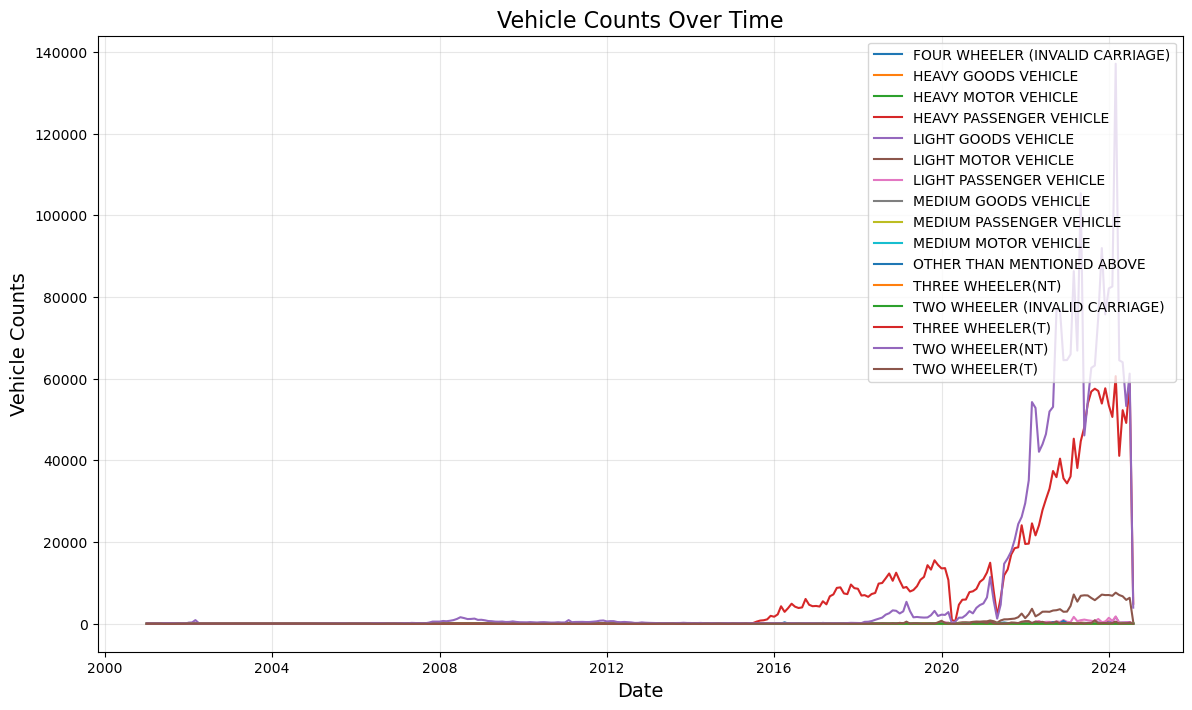

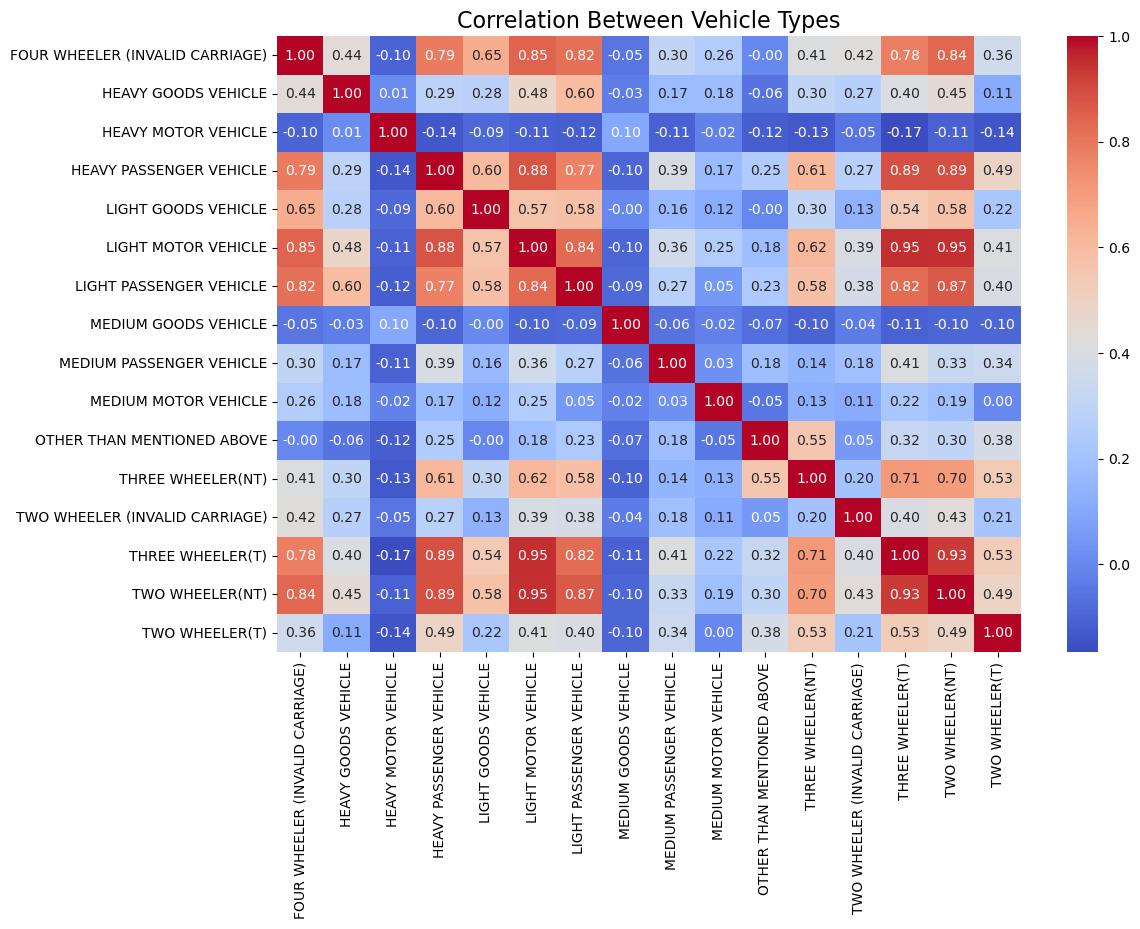

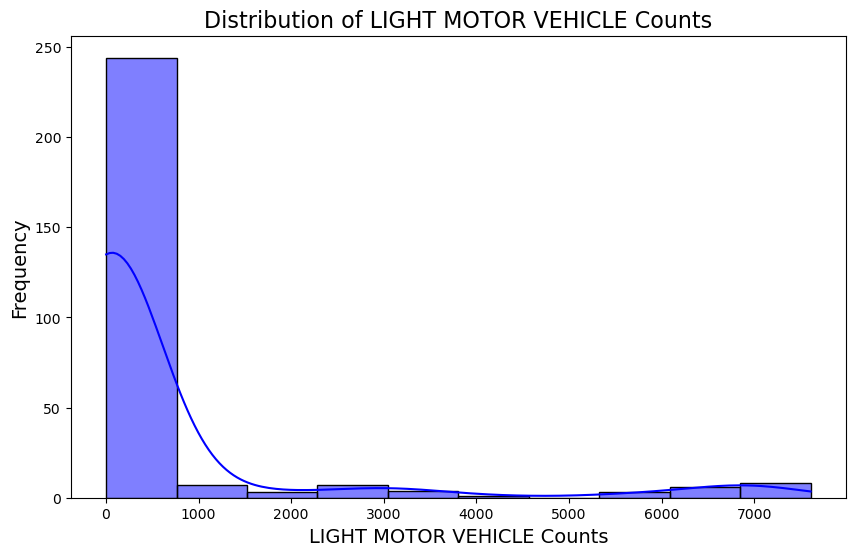

In [73]:
# Plot the data
plt.figure(figsize=(14, 8))

# Line plot for vehicle trends over time
for col in df_sorted.columns[1:]:
    plt.plot(df_sorted['Date'], df_sorted[col], label=col)

plt.title("Vehicle Counts Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Vehicle Counts", fontsize=14)
plt.legend(loc="upper right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(columns='Date').corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Vehicle Types", fontsize=16)
plt.show()

# Distribution plot for LIGHT MOTOR VEHICLE
plt.figure(figsize=(10, 6))
sns.histplot(df['LIGHT MOTOR VEHICLE'], kde=True, color="blue", bins=10)
plt.title("Distribution of LIGHT MOTOR VEHICLE Counts", fontsize=16)
plt.xlabel("LIGHT MOTOR VEHICLE Counts", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [58]:
# Define features (X) and target (y)
X = df_sorted.drop(columns=['LIGHT MOTOR VEHICLE','Date'])
y = df_sorted['LIGHT MOTOR VEHICLE']

In [59]:
X

,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,0,1,0,0,9,1,0,0,0,2,0,0,2,62,0
24,0,0,0,0,7,0,0,0,0,0,0,0,2,65,0
48,0,0,2,0,6,0,1,0,0,2,1,0,1,75,0
72,0,0,0,0,12,2,0,0,0,0,0,0,1,59,0
96,0,0,0,0,14,0,0,0,0,0,0,0,2,69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,0,0,219,279,182,0,2,0,0,17,0,41106,64503,11
118,5,30,0,244,284,126,0,1,20,0,30,2,52296,64025,90
142,2,3,0,129,375,357,0,0,0,0,29,2,49158,53299,115
166,1,3,0,390,340,232,0,2,0,0,37,0,59147,61237,180


In [60]:
y

0        15
24       28
48       26
72       20
96       17
       ... 
95     7023
118    6715
142    5833
166    6343
190     445
Name: LIGHT MOTOR VEHICLE, Length: 283, dtype: int64

In [61]:
X.dtypes

FOUR WHEELER (INVALID CARRIAGE)    int64
HEAVY GOODS VEHICLE                int64
HEAVY MOTOR VEHICLE                int64
HEAVY PASSENGER VEHICLE            int64
LIGHT GOODS VEHICLE                int64
LIGHT PASSENGER VEHICLE            int64
MEDIUM GOODS VEHICLE               int64
MEDIUM PASSENGER VEHICLE           int64
MEDIUM MOTOR VEHICLE               int64
OTHER THAN MENTIONED ABOVE         int64
THREE WHEELER(NT)                  int64
TWO WHEELER (INVALID CARRIAGE)     int64
THREE WHEELER(T)                   int64
TWO WHEELER(NT)                    int64
TWO WHEELER(T)                     int64
dtype: object

In [64]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.28010593, -0.09708261, -0.50386784, ..., -0.49848329,
        -0.37644366, -0.36610887],
       [-0.28010593, -0.18008678, -0.50386784, ..., -0.49848329,
        -0.37630417, -0.36610887],
       [-0.28010593, -0.18008678,  1.44948283, ..., -0.4985563 ,
        -0.37583923, -0.36610887],
       ...,
       [ 1.35432661,  0.06892572, -0.50386784, ...,  3.09057205,
         2.09875617,  0.51917333],
       [ 0.53711034,  0.06892572, -0.50386784, ...,  3.81990466,
         2.46782536,  1.01955023],
       [-0.28010593, -0.18008678, -0.50386784, ..., -0.14020567,
        -0.1962795 , -0.35841076]])

In [65]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [66]:
# Train a regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [67]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [68]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 143797.10325789472
R^2 Score: 0.9533412956328924


In [69]:
example_input = np.array(X.iloc[0]).reshape(1, -1)  # Use the first row for prediction
example_prediction = model.predict(scaler.transform(example_input))
print(f"Example Prediction (LIGHT MOTOR VEHICLE): {example_prediction[0]}")

Example Prediction (LIGHT MOTOR VEHICLE): 16.49


d:\APPs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


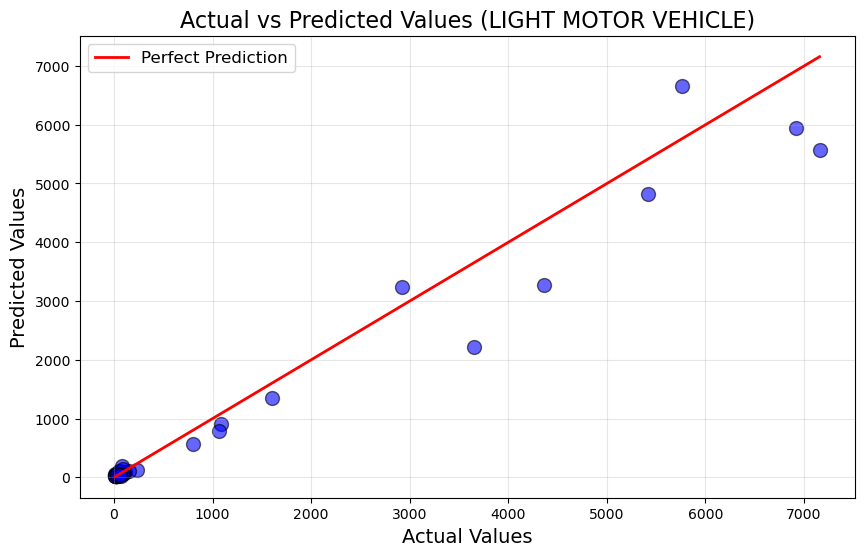

C:\Users\Shubham\AppData\Local\Temp\ipykernel_19876\1223011938.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="viridis")


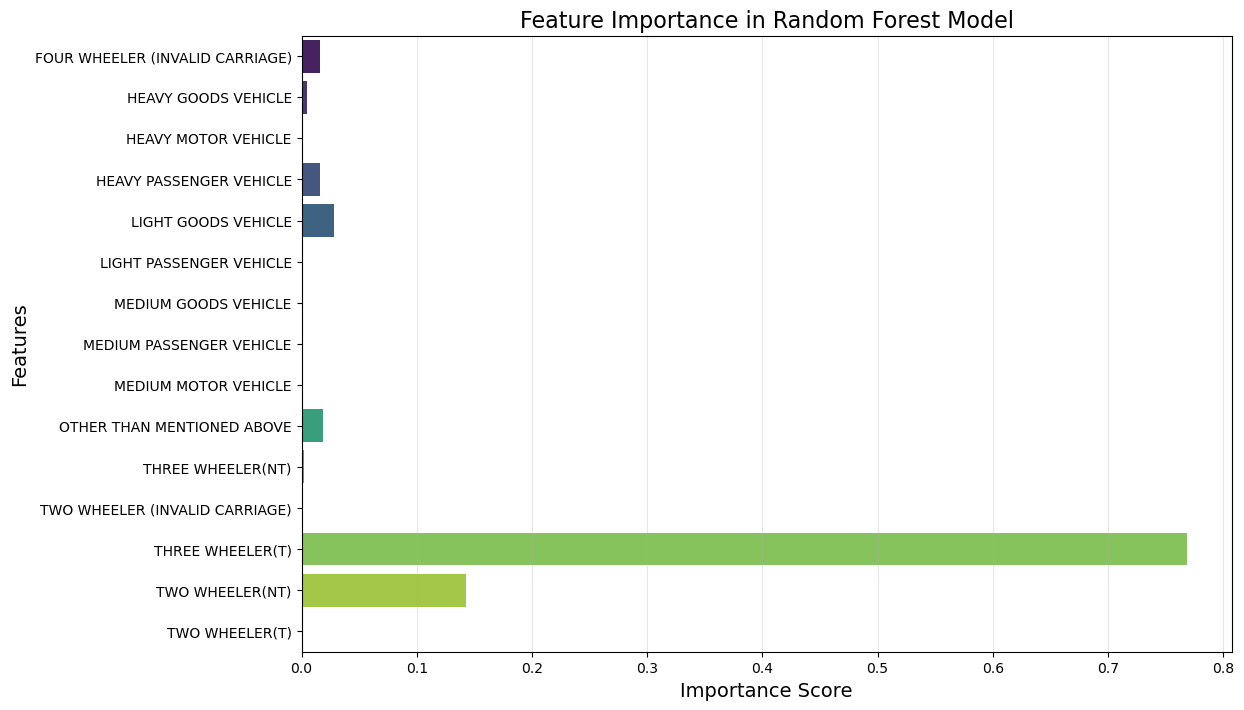

In [74]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, edgecolor="k", s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2, label="Perfect Prediction")
plt.title("Actual vs Predicted Values (LIGHT MOTOR VEHICLE)", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Feature importance plot
feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.title("Feature Importance in Random Forest Model", fontsize=16)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(axis="x", alpha=0.3)
plt.show()